# Lecture 11

## 6.2.1 Bisection Exercises

1) The first step in implementing any search algorithm is to get an idea of what your
function looks like. For the present problem you do this by making a plot or a table of $f(E) = √10−E_B tan(√10−E_B)−√E_B$ versus $E_B$. Note from your plot some approximate values at which $f(EB) = 0$. Your program should be able to find more exact values for these zeros.

3) Write a program that implements the bisection algorithm and uses it to find some
solutions of (6.2).

4) Warning: Seeing that the tan function has singularities, some care is suggested. In fact,
your graphics program may not function accurately near these singularities. One cure is
to use a different, but equivalent, form of the equation. Show that an equivalent form of
(6.2) is $$√E cot(√10−E)−√10−E= 0. \tag{6.6}$$

6) Make a second plot of (6.6), which also has singularities but at different places. Use this
plot to choose some xvalues that bracket the zeros.

7) After you have found a solution, evaluate f(EB) and thus determine the precision of your
solution.

8) Compare the roots you find with those given by Maple or Mathematica.

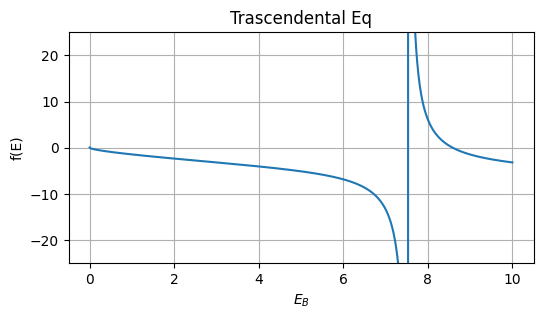

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def fE(EB):
    return np.sqrt(10-EB) * np.tan(np.sqrt(10-EB)) - np.sqrt(EB)

x_Values = np.linspace(0, 10, 1000)  # Only go up to 10 to avoid math errors
y_Values = []
for i in x_Values:
    y_Values.append(fE(i))

plt.figure(figsize=(6, 3))
plt.plot(x_Values,y_Values)
plt.ylim(-25, 25)
plt.xlabel(r"$E_B$")
plt.ylabel("f(E)")
plt.title("Trascendental Eq")
plt.grid()
plt.show()

$$
\sqrt{10−E_B} \quad tan(\sqrt{10−E_B})= \sqrt{E_B} \quad(\text{even}), \tag{6.2}
$$

In [2]:
def f(x): return np.sqrt(10-x) * np.tan(np.sqrt(10-x))   

def Bisection(Xminus, Xplus, Nmax, eps):          # Do not change    
   for it in range(0, Nmax):
       x = (Xplus +  Xminus)/2.                      
       print(" it =", it, " x = ", x, " f(x) =", f(x))
       if (f(Xplus)*f(x) > 0.): Xplus = x       # Change x+ to x
       else: Xminus =  x                        # Change x- to x
       if (abs(f(x) ) < eps):                   # Converged?
          print("\n Root found with precision eps = ", eps)
          break
       if it == Nmax-1: print ("\n No root after N iterations\n")
   return x


eps = 1e-3;  Nmax = 1000;  a = 8; b = 9    # Precision, [a,b]

root = Bisection(a, b, Nmax, eps)
print(" Root =", root)

 it = 0  x =  8.5  f(x) = 3.3967829356981
 it = 1  x =  8.25  f(x) = 5.2261094958990295
 it = 2  x =  8.125  f(x) = 6.703687723056202
 it = 3  x =  8.0625  f(x) = 7.699338372945305
 it = 4  x =  8.03125  f(x) = 8.28954165269961
 it = 5  x =  8.015625  f(x) = 8.612966230470503
 it = 6  x =  8.0078125  f(x) = 8.782573976022935
 it = 7  x =  8.00390625  f(x) = 8.869466214158201
 it = 8  x =  8.001953125  f(x) = 8.913449630600972
 it = 9  x =  8.0009765625  f(x) = 8.935577623366184
 it = 10  x =  8.00048828125  f(x) = 8.946675939745308
 it = 11  x =  8.000244140625  f(x) = 8.952233709285167
 it = 12  x =  8.0001220703125  f(x) = 8.955014750826923
 it = 13  x =  8.00006103515625  f(x) = 8.956405811283496
 it = 14  x =  8.000030517578125  f(x) = 8.957101476494861
 it = 15  x =  8.000015258789062  f(x) = 8.957449342854026
 it = 16  x =  8.000007629394531  f(x) = 8.957623284472929
 it = 17  x =  8.000003814697266  f(x) = 8.957710257392343
 it = 18  x =  8.000001907348633  f(x) = 8.957753744379

In [3]:
print(fE(root))
print(fE(8.589))

6.129370106972257
0.01809740818987482


3) Show Eq 6.2 = Eq 6.6

$$
\sqrt(10-x) \quad \tan(\sqrt{10-x}) = \sqrt{x} 
$$
$$
\sqrt(10-x) = \frac{\sqrt{x}}{tan(\sqrt{10-x})}
$$
$$
\sqrt(10-x) = \sqrt{x} \quad cot(\sqrt{10-x}) \\
$$

$$
\sqrt(x) cot(\sqrt(10−x))−\sqrt(10−x)= 0 \tag{6.6}
$$

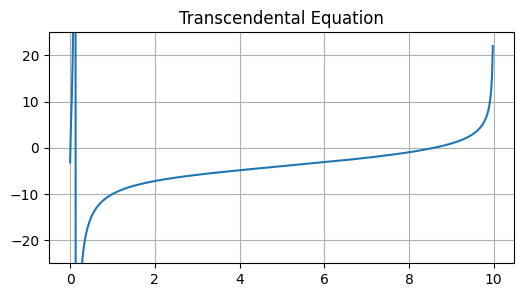

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def cotan(x):
    # Return np.nan to avoid issues near singularities
    try:
        return 1 / np.tan(x)
    except ZeroDivisionError:
        return np.nan

def LHS(x):
    if np.sqrt(10 - x) == 0:
        return np.nan  # Avoid division by zero or tan approaching infinity
    return np.sqrt(x) * cotan(np.sqrt(10 - x)) - np.sqrt(10 - x)

x_Values = np.linspace(0, 10, 500)  # Only go up to 10 to avoid math errors
LHSa = []

for i in x_Values:
    LHSa.append(LHS(i))

plt.figure(figsize=(6, 3))
plt.plot(x_Values, LHSa)
#plt.xlabel(r"$\sqrt{x} \quad cot(\sqrt{10-x})$")
#plt.ylabel(r"$\sqrt(10-x)$")
# Adjust y-axis limits to prevent extreme spikes
plt.ylim(-25, 25)
plt.title("Transcendental Equation")
plt.grid()
plt.show()


In [5]:
# Bisection Method
def Bisection(Xminus, Xplus, Nmax=100, eps=1e-3):
    for it in range(0, Nmax):
        x = (Xplus + Xminus) / 2.  # Midpoint
        print(f"Iteration {it}: x = {x}, f(x) = {LHS(x)}")
        if LHS(Xplus) * LHS(x) > 0:
            Xplus = x  # Narrow the search range
        else:
            Xminus = x
        if abs(LHS(x)) < eps:  # Convergence check
            print(f"\nRoot found with precision {eps}: {x}")
            break
        if it == Nmax - 1:
            print("\nNo root found after N iterations.")
    return x

# Adjust the initial bracketing interval based on your plot
a, b = 8.0, 9.0  # Refined interval based on your plot observation

root = Bisection(a, b)
print(f"Root = {root}")

Iteration 0: x = 8.5, f(x) = -0.17354016332931788
Iteration 1: x = 8.75, f(x) = 0.3209534261982363
Iteration 2: x = 8.625, f(x) = 0.06281716092993817
Iteration 3: x = 8.5625, f(x) = -0.057809067054070296
Iteration 4: x = 8.59375, f(x) = 0.0018609869548624758
Iteration 5: x = 8.578125, f(x) = -0.02813073123925225
Iteration 6: x = 8.5859375, f(x) = -0.013174542465707928
Iteration 7: x = 8.58984375, f(x) = -0.005666758528423577
Iteration 8: x = 8.591796875, f(x) = -0.0019053889427707027
Iteration 9: x = 8.5927734375, f(x) = -2.282778231332827e-05

Root found with precision 0.001: 8.5927734375
Root = 8.5927734375


In [6]:
print(LHS(root))
print(LHS(8.599))

-2.282778231332827e-05
0.012009944322416866


In [7]:
# This is an example from google AI to use the fsolve.
# You can adapt it to your functions and choose an
# appropriate range. Note the method is similar whatever
# algorithm is implemented whether it is Bisection,
# Newton-Raphson, or some other method.
import numpy as np
from scipy.optimize import fsolve

# Initial guess for the root
initial_guess = 8.0
# Find the root using fsolve
root = fsolve(LHS, initial_guess)
# Print the root
print("Root:", root[0])
# Find multiple roots by iterating through different initial guesses
for i in range(0, 10):
    initial_guess = i
    root = fsolve(LHS, initial_guess)
print(f"Root with initial guess {initial_guess}: {root[0]}")


Root: 8.592785275229838
Root with initial guess 9: 8.592785275229838


## 6.3.1 Search + Backtracking (Newton–Raphson)

1) Use the Newton–Raphson algorithm to find some energies EB that are solutions of (6.2).
Compare this solution with the one found with the bisection algorithm.

3) Again,notice that the 10 in this equation is proportional to the strength of the potential
that causes the binding. See if making the potential deeper, say, by changing the 10 to
a 20 or a 30, produces more or deeper bound states. (Note that in contrast to the bisection algorithm, your initial guess must be closer to the answer for the Newton–Raphson algorithm to work.)

4) Modify your algorithm to include backtracking and then try it out on some difficult
cases.
5) Evaluate f(EB) and thus determine directly the precision of your solution.

In [8]:
# Newton-Raphson Method
def Newton_Raphson(initial_guess, tol=1e-6, max_iter=100):
    x = initial_guess
    for it in range(max_iter):
        fx = LHS(x)
        f_prime_x = LHS_prime(x)
        
        # Avoid division by zero or too small derivative
        if f_prime_x == 0 or np.isnan(f_prime_x):
            print(f"Derivative is zero or undefined at x = {x}.")
            break
        
        # Newton-Raphson update
        x_new = x - fx / f_prime_x
                
        # Convergence check
        if abs(LHS(x_new)) < tol:
            print(f"\nRoot found with precision {tol}: x = {x_new}")
            return x_new
        
        x = x_new
        print(f"Iteration {it}: x = {x}, f(x) = {LHS(x)}")
        
        # Maximum iterations reached
        if it == max_iter - 1:
            print("\nNo root found after N iterations.")
            return x
    
    return x

In [9]:
#lets use LHS of eq 6.6 instead of 6.2

#but i need its derivative (approximation) eq 6.12
def LHS_prime(x, epsilon=1e-6):
    return (LHS(x + epsilon) - LHS(x - epsilon)) / (2 * epsilon)


# Newton-Raphson method
initial_guess = 8.0  
try:
    EB_newton = Newton_Raphson(initial_guess)
    print(f"Newton-Raphson solution: {EB_newton}")
except ValueError as e:
    print(f"Newton-Raphson failed: {e}")
    
# Bisection method
a, b = 8, 9  # Interval where root is known to exist
try:
    EB_bisection = Bisection(a, b)
    print(f"Bisection solution: {EB_bisection}")
except ValueError as e:
    print(f"Bisection failed: {e}")

Iteration 0: x = 8.688057759107133, f(x) = 0.19001757048449042
Iteration 1: x = 8.596003143452998, f(x) = 0.006212153595843484
Iteration 2: x = 8.59278880901076, f(x) = 6.814550197908886e-06

Root found with precision 1e-06: x = 8.592785275234093
Newton-Raphson solution: 8.592785275234093
Iteration 0: x = 8.5, f(x) = -0.17354016332931788
Iteration 1: x = 8.75, f(x) = 0.3209534261982363
Iteration 2: x = 8.625, f(x) = 0.06281716092993817
Iteration 3: x = 8.5625, f(x) = -0.057809067054070296
Iteration 4: x = 8.59375, f(x) = 0.0018609869548624758
Iteration 5: x = 8.578125, f(x) = -0.02813073123925225
Iteration 6: x = 8.5859375, f(x) = -0.013174542465707928
Iteration 7: x = 8.58984375, f(x) = -0.005666758528423577
Iteration 8: x = 8.591796875, f(x) = -0.0019053889427707027
Iteration 9: x = 8.5927734375, f(x) = -2.282778231332827e-05

Root found with precision 0.001: 8.5927734375
Bisection solution: 8.5927734375


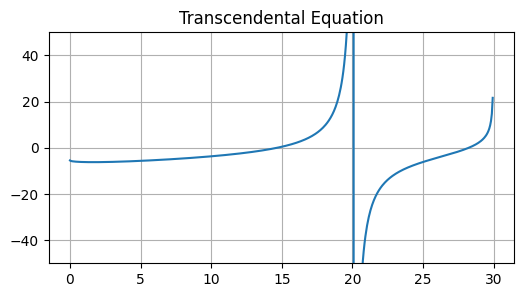

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def cotan(x):
    # Return np.nan to avoid issues near singularities
    try:
        return 1 / np.tan(x)
    except ZeroDivisionError:
        return np.nan

def LHS(x):
    if np.sqrt(30 - x) == 0:
        return np.nan  # Avoid division by zero or tan approaching infinity
    return np.sqrt(x) * cotan(np.sqrt(30 - x)) - np.sqrt(30 - x)

x_Values = np.linspace(0, 30, 500)  
LHSa = []

for i in x_Values:
    LHSa.append(LHS(i))

plt.figure(figsize=(6, 3))
plt.plot(x_Values, LHSa)
#plt.xlabel(r"$\sqrt{x} \quad cot(\sqrt{10-x})$")
#plt.ylabel(r"$\sqrt(10-x)$")
# Adjust y-axis limits to prevent extreme spikes
plt.ylim(-50, 50)
plt.title("Transcendental Equation")
plt.grid()
plt.show()


In [11]:
# Newton-Raphson method
initial_guess = 8.0  
try:
    EB_newton = Newton_Raphson(initial_guess)
    print(f"Guess: {initial_guess}")
except ValueError as e:
    print(f"Newton-Raphson failed: {e}")
    
# Bisection method
a, b = 10, 15  # Interval where root is known to exist
try:
    EB_bisection = Bisection(a, b)
    print(f"Interval: {a,b}")
except ValueError as e:
    print(f"Bisection failed: {e}")


print("-------------------------------------------------------")


# Newton-Raphson method
initial_guess = 26.0  
try:
    EB_newton = Newton_Raphson(initial_guess)
    print(f"Guess: {initial_guess}")
except ValueError as e:
    print(f"Newton-Raphson failed: {e}")
    
# Bisection method
a, b = 26, 29  # Interval where root is known to exist
try:
    EB_bisection = Bisection(a, b)
    print(f"Interval: {a,b}")
except ValueError as e:
    print(f"Bisection failed: {e}")

Iteration 0: x = 19.22975254986639, f(x) = 27.788093128120405
Iteration 1: x = 18.439584258607518, f(x) = 12.842075806821908
Iteration 2: x = 17.187094788259305, f(x) = 5.274329758988715
Iteration 3: x = 15.729127652767435, f(x) = 1.5927970687101962
Iteration 4: x = 14.839564056357796, f(x) = 0.2244875080863049
Iteration 5: x = 14.670418016131805, f(x) = 0.005509094221463506
Iteration 6: x = 14.666056155470507, f(x) = 3.445309348037995e-06

Root found with precision 1e-06: x = 14.66605342420987
Guess: 8.0
Iteration 0: x = 12.5, f(x) = -2.116095676558315
Iteration 1: x = 13.75, f(x) = -1.0247961868968605
Iteration 2: x = 14.375, f(x) = -0.35257394048621027
Iteration 3: x = 14.6875, f(x) = 0.027136931660107777
Iteration 4: x = 14.53125, f(x) = -0.16683621480628386
Iteration 5: x = 14.609375, f(x) = -0.07092102931082289
Iteration 6: x = 14.6484375, f(x) = -0.02216540128977984
Iteration 7: x = 14.66796875, f(x) = 0.0024167217249839723
Iteration 8: x = 14.658203125, f(x) = -0.00989151169596

In [12]:
print(LHS(EB_newton))
print(LHS(EB_bisection))

1.7594623535899245e-09
0.00024643436141857933


In [13]:
# NewtonRaphson with backtracking

# Newton-Raphson Method
def Newton_RaphsonB(initial_guess, tol=1e-6, max_iter=100, backtrack_factor=0.5):
    x = initial_guess
    for it in range(max_iter):
        fx = LHS(x)
        f_prime_x = LHS_prime(x)
        
        # Avoid division by zero or too small derivative
        if f_prime_x == 0 or np.isnan(f_prime_x):
            print(f"Derivative is zero or undefined at x = {x}.")
            break
        
        # Newton-Raphson update
        x_new = x - fx / f_prime_x
        
        # Backtracking if the next guess does not reduce the error sufficiently
        if abs(LHS(x_new)) > abs(fx):
            print(f"Backtracking: Reducing step size at iteration {it}")
            x_new = x - backtrack_factor * (fx / f_prime_x)    

        
        # Convergence check
        if abs(LHS(x_new)) < tol:
            print(f"\nRoot found with precision {tol}: x = {x_new}")
            return x_new
        
        x = x_new
        print(f"Iteration {it}: x = {x}, f(x) = {LHS(x)}")
        
        # Maximum iterations reached
        if it == max_iter - 1:
            print("\nNo root found after N iterations.")
            return x
    
    return x

In [14]:
# test a poorly guessed solution with both

# Newton-Raphson method
initial_guess = 20
try:
    EB_newton = Newton_Raphson(initial_guess)
    print(f"Guess: {initial_guess}")
except ValueError as e:
    print(f"Newton-Raphson failed: {e}")

try:
    EB_newtonB = Newton_RaphsonB(initial_guess)
    print(f"Guess: {initial_guess}")
except ValueError as e:
    print(f"Newton-Raphson failed: {e}")

Iteration 0: x = 19.87155930642438, f(x) = 105.67235343555197
Iteration 1: x = 19.620683458297766, f(x) = 51.95851783710657
Iteration 2: x = 19.143701559494453, f(x) = 25.02283052928944
Iteration 3: x = 18.2916386990999, f(x) = 11.442809197267948
Iteration 4: x = 16.980378879014026, f(x) = 4.571107432700275
Iteration 5: x = 15.551996053251315, f(x) = 1.2858865097074141
Iteration 6: x = 14.785213458141586, f(x) = 0.15293498484226742
Iteration 7: x = 14.668104620452834, f(x) = 0.0025882109090118455

Root found with precision 1e-06: x = 14.666054027356827
Guess: 20
Iteration 0: x = 19.87155930642438, f(x) = 105.67235343555197
Iteration 1: x = 19.620683458297766, f(x) = 51.95851783710657
Iteration 2: x = 19.143701559494453, f(x) = 25.02283052928944
Iteration 3: x = 18.2916386990999, f(x) = 11.442809197267948
Iteration 4: x = 16.980378879014026, f(x) = 4.571107432700275
Iteration 5: x = 15.551996053251315, f(x) = 1.2858865097074141
Iteration 6: x = 14.785213458141586, f(x) = 0.1529349848422

In [15]:
LHS(EB_newtonB)

np.float64(7.608318481899801e-07)

## 6.7.2 Linear Quadratic Fit

### 6.7.2.1 Linear Quadratic Fit Assessment

1) Fit the quadratic (6.52) to the following datasets [given as (x1, y1), (x2, y2), …]. In each case, indicate the values found for the a's, the number of degrees of freedom, and the value of 𝜒².

  - a) (0, 1)

  - b) (0, 1), (1, 3)

  - c) (0, 1), (1, 3), (2, 7)

  - d) (0, 1), (1, 3), (2, 7), (3, 15)

2) Find a fit to the last set of data to the function $y = A e^{(-b x²)}$.

   Hint: A judicious change of variables will permit you to convert this to a linear fit. Does a minimum 𝜒² still have meaning here?


From the book we see eq 6.52, a simple quadratic 

$$
g(x) = a_1 +a_2x+a_3x^2 \tag{6.52}
$$

but it mentions this require a matrix approach to solve the system of linear equations, then the exponential fit needs to be handled by linearizing the model the use the same approach as in 1).

I'm not going to show that the eqs can be arranged on a matrix form and I'll take from granted that `Fit.py` does what it need to be doing. 

Here is a function that incorporates the technique of `Fit.py` for our use:

Let me write the matrix here so can see better, i guess.

$$
\mathbf{A} \vec{x} = \vec{b}, \tag{6.57}
$$

$$
\mathbf{A} =
\begin{pmatrix}
S & S_x & S_{xx} \\
S_x & S_{xx} & S_{xxx} \\
S_{xx} & S_{xxx} & S_{xxxx}
\end{pmatrix}
, \quad
\vec{x} =
\begin{pmatrix}
a_1 \\
a_2 \\
a_3
\end{pmatrix}
, \quad
\vec{b} =
\begin{pmatrix}
S_y \\
S_{xy} \\
S_{xxy}
\end{pmatrix}
$$


After reviewing `Fit.py` it seems it uses 2 methods to solve for x, and im more inclined to keep gaussian elimination but ill try to keep both... maybe

In [16]:
import numpy as np
import pylab as p
from numpy.linalg import inv, solve, LinAlgError #lets use their same set of libraries and LinAlgError for error handleing

def fit_quadratic(x, y, sig):
    """
    Fit quadratic function to data using least-squares via matrix solution
    Args:
        x: array of x data points
        y: array of y data points
        sig: array of error bars for y data points
    Returns:
        xvec: array of fitted parameters [a0, a1, a2] for the quadratic fit
    """
    Nd = len(x)  # Number of data points
    A = np.zeros((3, 3), float)  # Coefficient matrix
    bvec = np.zeros((3, 1), float)  # Right-hand side vector

    # Initialize sums
    ss= sx = sxx = sy = sxxx = sxxxx = sxy = sxy = sxxy = 0.

    for i in range(0, Nd):                                      
        sig2 = sig[i] * sig[i]
        ss  += 1. / sig2; sx += x[i]/sig2; sy += y[i]/sig2
        rhl  = x[i] * x[i]; sxx += rhl/sig2;  sxxy += rhl*y[i]/sig2
        sxy += x[i]*y[i]/sig2; sxxx +=rhl*x[i]/sig2
        sxxxx +=rhl*rhl/sig2
        
    A    = np.array([ [ss,sx,sxx], [sx,sxx,sxxx], [sxx,sxxx,sxxxx] ])
    bvec = np.array([sy, sxy, sxxy])

    # Solve the system using matrix inversion or Gaussian elimination

    # Solve the system using matrix inversion
    try:
        # Solve the system using matrix inversion
        #xvec_inv = np.multiply(np.linalg.inv(A), bvec) #Replaced for a vector not a matrix
        xvec_inv = np.linalg.inv(A).dot(bvec)
    except LinAlgError:
        # Handle singular matrix error
        print("Matrix is singular (non-invertible), skip inversion.")
        xvec_inv = None

    # Solve the system using Gaussian elimination
    try:
        # Try to solve using Gaussian elimination
        xvec_solve = np.linalg.solve(A, bvec)
    except LinAlgError:
        # If Gaussian elimination fails (singular matrix), set it to None
        print("Gaussian elimination failed (singular matrix).")
        xvec_solve = None

    return xvec_inv, xvec_solve

For the exponential thing, let's linearize it first then call the fit_quadratic function above to find x

In [17]:
def fit_exponential(x, y, sig):
    """
    Fit the function y = A * exp(-b * x^2) using a linearization approach.
    This requires a transformation to linearize the data for fitting.
    Args:
        x: array of x data points
        y: array of y data points
        sig: array of error bars for y data points
    Returns:
        fitted_params: array of parameters [A, b] for the exponential fit
    """
    # Transformation to linearize the exponential model
    transformed_y = np.log(y)
    transformed_x = x**2

    # Use the quadratic fitting procedure for the transformed data
    return fit_quadratic(transformed_x, transformed_y, sig)

Now we can just ask it for the x values for all cases 1) from a) to d) for 6.52 and d) for 2)

Lets make a dictionary with all letters and points so we can iterate through it and plot everything at once

Seem like a good idea but got an "Singular matrix" error, probably because I kept the inversion method. And the first cases have no solution or something related to the small data points. 

Wrong, it raises the error even for the gaussian method. Right, it only happens with a) and b).

I'm going to add a way for the function to just try it whenever it is possible.

replace:
``` python
    # Solve the system using matrix inversion
    xvec_inv = np.multiply(np.linalg.inv(A), bvec)
```

with:

```python
    # Solve the system using matrix inversion
    try:
        # Solve the system using matrix inversion
        xvec_inv = np.multiply(np.linalg.inv(A), bvec)
    except LinAlgError:
        # Handle singular matrix error
        print("Matrix is singular (non-invertible), skip inversion.")
        xvec_inv = None
```

and same thing for gauss... which will give me nothing on a) and b)...

In [18]:
data_sets = {
    'a': (np.array([0]), np.array([1]), np.array([0.1])),
    'b': (np.array([0, 1]), np.array([1, 3]), np.array([0.1, 0.1])),
    'c': (np.array([0, 1, 2]), np.array([1, 3, 7]), np.array([0.1, 0.1, 0.1])),
    'd': (np.array([0, 1, 2, 3]), np.array([1, 3, 7, 15]), np.array([0.1, 0.1, 0.1, 0.1])),
}

# Fit quadratic for each dataset (a, b, c, d)
for label, (x_data, y_data, sig_data) in data_sets.items():
    params_inv, params_solve = fit_quadratic(x_data, y_data, sig_data)
    print(f"Quadratic Fit {label} (Matrix Inversion) Parameters (a0, a1, a2): \n", params_inv)
    print(f"Quadratic Fit {label} (Gaussian Elimination) Parameters (a0, a1, a2): \n", params_solve)

# Now call fit_exponential on the values of 'd'
x_data_d, y_data_d, sig_data_d = data_sets['d']  # Extract dataset 'd'
params_exp_inv, params_exp_solve = fit_exponential(x_data_d, y_data_d, sig_data_d)
print("Exponential Fit (Matrix Inversion) Parameters (A, b): \n", params_exp_inv)
print("Exponential Fit (Gaussian Elimination) Parameters (A, b): \n", params_exp_solve)

Matrix is singular (non-invertible), skip inversion.
Gaussian elimination failed (singular matrix).
Quadratic Fit a (Matrix Inversion) Parameters (a0, a1, a2): 
 None
Quadratic Fit a (Gaussian Elimination) Parameters (a0, a1, a2): 
 None
Matrix is singular (non-invertible), skip inversion.
Gaussian elimination failed (singular matrix).
Quadratic Fit b (Matrix Inversion) Parameters (a0, a1, a2): 
 None
Quadratic Fit b (Gaussian Elimination) Parameters (a0, a1, a2): 
 None
Quadratic Fit c (Matrix Inversion) Parameters (a0, a1, a2): 
 [1. 1. 1.]
Quadratic Fit c (Gaussian Elimination) Parameters (a0, a1, a2): 
 [1. 1. 1.]
Quadratic Fit d (Matrix Inversion) Parameters (a0, a1, a2): 
 [1.1 0.1 1.5]
Quadratic Fit d (Gaussian Elimination) Parameters (a0, a1, a2): 
 [1.1 0.1 1.5]
Exponential Fit (Matrix Inversion) Parameters (A, b): 
 [ 0.20750756  0.61788226 -0.03803887]
Exponential Fit (Gaussian Elimination) Parameters (A, b): 
 [ 0.20750756  0.61788226 -0.03803887]


Okay whatever, probably a and b are better handled by just a normal linear fitting.

lets continue anc calculate $\chi^2$ and degrees of freedom (df), for that i'm making a function for $\chi^2$ and then call
everything again and print them all. For df is just $df = N - P$ and since we have 3 as then P = 3 

In [19]:
def calculate_chi_squared(x, y, sig, xvec):
    """
    Calculate chi-squared for the fit.
    Args:
        x: array of x data points
        y: array of y data points
        sig: array of error bars for y data points
        xvec: fitted parameters [a0, a1, a2]
    Returns:
        chi_squared: computed chi-squared value
    """
    chi_squared = 0
    # Iterate over the data points to calculate chi-squared
    for i in range(len(x)):
        y_fit = xvec[0] + xvec[1] * x[i] + xvec[2] * x[i]**2  # Model (quadratic) fit
        chi_squared += ((y[i] - y_fit) ** 2) / (sig[i] ** 2)  # Squared residuals / error^2
    return chi_squared

In [20]:
# Fit quadratic only for datasets 'c' and 'd'
for label in ['c', 'd']:  # Only iterate over 'c' and 'd'

    #Quad
    x_data, y_data, sig_data = data_sets[label]
    params_inv, params_solve = fit_quadratic(x_data, y_data, sig_data)
    
  
    # If inversion is successful, calculate chi-squared for the fit
    if params_inv is not None:
        chi_squared = calculate_chi_squared(x_data, y_data, sig_data, params_inv)
        df = len(x_data) - 3  # Degrees of freedom (N - P)
        print(f"Quadratic Fit {label} (Matrix Inversion) Parameters (a0, a1, a2): \n", params_inv)
        print(f"Degrees of Freedom: {df}")
        print(f"Chi-Squared: {chi_squared}\n")
        
    if params_solve is not None:
        chi_squared = calculate_chi_squared(x_data, y_data, sig_data, params_solve)
        df = len(x_data) - 3  # Degrees of freedom (N - P)
        print(f"Quadratic Fit {label} (Gaussian Elimination) Parameters (a0, a1, a2): \n", params_solve)
        print(f"Degrees of Freedom: {df}")
        print(f"Chi-Squared: {chi_squared}\n")


    # Exponential

x_data_d, y_data_d, sig_data_d = data_sets['d']  # Extract dataset 'd'
params_exp_inv, params_exp_solve = fit_exponential(x_data_d, y_data_d, sig_data_d)

if params_exp_inv is not None:
    chi_squared_exp = calculate_chi_squared(x_data_d, y_data_d, sig_data_d, params_exp_inv)
    df_exp = len(x_data_d) - 3  # Degrees of freedom for exponential fit
    print("Exponential Fit for d (Matrix Inversion) Parameters (A, b): \n", params_exp_inv)
    print(f"Degrees of Freedom: {df_exp}")
    print(f"Chi-Squared: {chi_squared_exp}\n")

if params_exp_solve is not None:
    chi_squared_exp = calculate_chi_squared(x_data_d, y_data_d, sig_data_d, params_exp_solve)
    df_exp = len(x_data_d) - 3  # Degrees of freedom for exponential fit
    print("Exponential Fit for d (Gaussian Elimination) Parameters (A, b): \n", params_exp_solve)
    print(f"Degrees of Freedom: {df_exp}")
    print(f"Chi-Squared: {chi_squared_exp}\n")


Quadratic Fit c (Matrix Inversion) Parameters (a0, a1, a2): 
 [1. 1. 1.]
Degrees of Freedom: 0
Chi-Squared: 2.306629286866238e-25

Quadratic Fit c (Gaussian Elimination) Parameters (a0, a1, a2): 
 [1. 1. 1.]
Degrees of Freedom: 0
Chi-Squared: 3.9443045261050585e-29

Quadratic Fit d (Matrix Inversion) Parameters (a0, a1, a2): 
 [1.1 0.1 1.5]
Degrees of Freedom: 1
Chi-Squared: 19.999999999999996

Quadratic Fit d (Gaussian Elimination) Parameters (a0, a1, a2): 
 [1.1 0.1 1.5]
Degrees of Freedom: 1
Chi-Squared: 19.999999999999996

Exponential Fit for d (Matrix Inversion) Parameters (A, b): 
 [ 0.20750756  0.61788226 -0.03803887]
Degrees of Freedom: 1
Chi-Squared: 21450.53633136172

Exponential Fit for d (Gaussian Elimination) Parameters (A, b): 
 [ 0.20750756  0.61788226 -0.03803887]
Degrees of Freedom: 1
Chi-Squared: 21450.536331361778



I'm getting weird values of $\chi^2$ like arrays... 


After reviewing the code I think the problem lies in this line on the fit_quadratic function

``` python
    xvec_inv = np.multiply(np.linalg.inv(A), bvec)
```

since np.multiply returns an array.

replace with .dot so it's only a value and re run everything to see what impact it has...

``` python
    xvec_inv = np.linalg.inv(A).dot(bvec)
```

That fixed it, arrays no longer an issue, but the $\chi^2$ are huge! I want to try plot this, this are not good fits at all



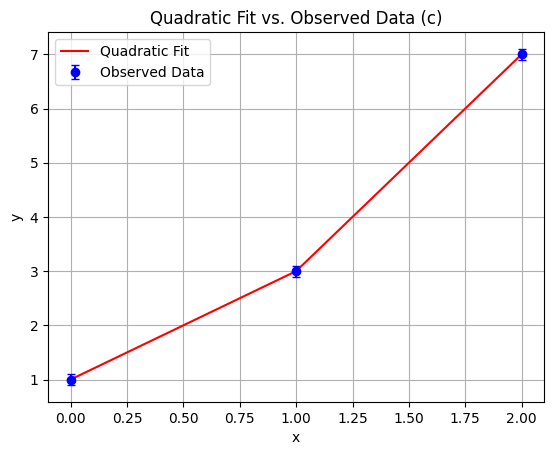

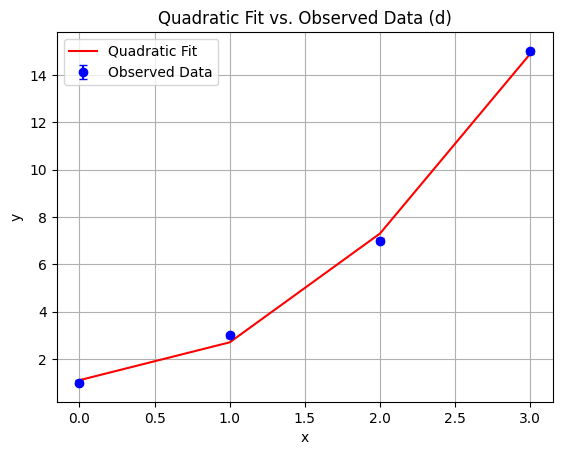

In [21]:
def plot_data_and_fit(x, y, y_fit, sig, label):
    """
    Plot the observed data, error bars, and the quadratic fit.
    Args:
        x: array of x data points
        y: array of y data points
        y_fit: array of fitted y values
        sig: array of error bars for y data points
        label: label for the plot (e.g., 'Dataset c')
    """
    # Plot the observed data with error bars
    p.errorbar(x, y, yerr=sig, fmt='bo', label="Observed Data", capsize=3)  # 'bo' for blue circles

    # Plot the quadratic fit (red line)
    p.plot(x, y_fit, 'r-', label="Quadratic Fit")  # Red line for fitted data
    
    # Set labels and title
    p.xlabel("x")
    p.ylabel("y")
    p.title(f"Quadratic Fit vs. Observed Data ({label})")
    
    # Show legend and grid
    p.legend()
    p.grid(True)
    
    # Display the plot
    p.show()

# Example: Plotting for dataset 'c' and 'd'
for label in ['c', 'd']:  # Only iterate over 'c' and 'd'
    x_data, y_data, sig_data = data_sets[label]
    params_inv, params_solve = fit_quadratic(x_data, y_data, sig_data)

    if params_solve is not None:
        # Compute the fitted values for quadratic fit
        y_fit = params_solve[0] + params_solve[1] * x_data + params_solve[2] * x_data**2
        
        # Plot the observed data with error bars and the fitted curve
        plot_data_and_fit(x_data, y_data, y_fit, sig_data, label)

## 6.8 Nonlinear Fit to a Resonance

Nonlinear Fit Exercise
Use the Newton–Raphson algorithm as outlined in Section 6.8 to conduct a nonlinear search for the best-fit parameters of the Breit–Wigner theory (6.58) to the data in Table 6.1. Compare the deduced values of (fr, ER, Γ) to that obtained by inspection of the graph.


Start with the given data or Table 6.1

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Given Data (Table 6.1)
Ei = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])  # Energy (MeV)
g_Ei = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])  # g(Ei) (MB)
error = np.array([9.34, 17.9, 41.5, 85.5, 51.5, 21.5, 10.8, 6.29, 4.14])  # Error (MB)

Plot to get an idea what are we trying to fit

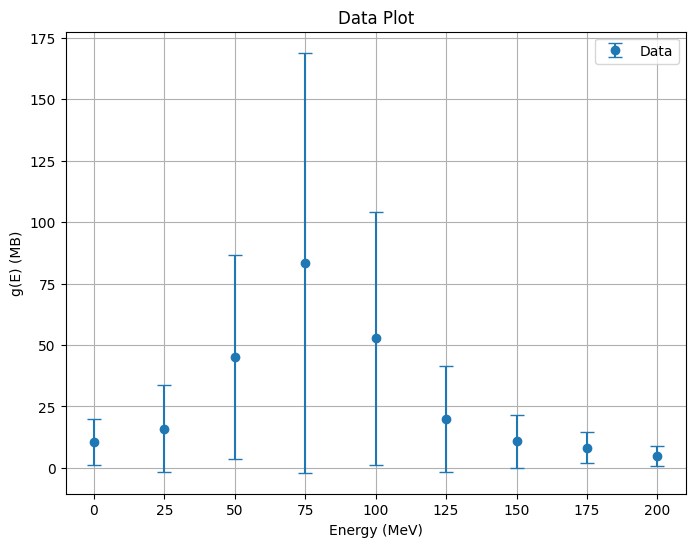

In [37]:
# Plot the data with error bars
plt.figure(figsize=(8,6))
plt.errorbar(E, g, yerr=error, fmt='o', capsize=5, label='Data')
plt.xlabel('Energy (MeV)')
plt.ylabel('g(E) (MB)')
plt.title('Data Plot')
plt.legend()
plt.grid(True)
plt.show()

Define the Breit–Wigner function eq 6.58, the book says fr,Er,and $\Gamma$ are "unknown" parameters.

and gives the derivatives, showing the equivalence with eq 6.61

In [38]:
# Breit-Wigner model function
def model(E, params):
    fr, Er, Gamma = params
    # Denominator: (E - Er)^2 + Gamma^2/4
    D = (E - Er)**2 + (Gamma**2)/4
    return fr / D

def model_derivatives(E, params):
    """Analytical partial derivatives of f(E) with respect to the parameters."""
    fr, Er, Gamma = params
    D = (E - Er)**2 + (Gamma**2)/4
    d_fr = 1.0 / D
    d_Er = 2 * fr * (E - Er) / (D**2)
    d_Gamma = - fr * Gamma / (2 * D**2)
    return d_fr, d_Er, d_Gamma

Also from the book

    Because fr ≡ a1 is the peak value of the cross section, ER ≡ a2 is the energy at which the
    peak occurs, and Γ = 2√a3 is the full width of the peak at half-maximum, good guesses for
    the a’s can be extracted from a graph of the data


An initial guess for [fr, Er, Gamma] is chosen as follows:

from the plot, 
Er, the peak is near E ~ 75 MeV. point (75,83.5)

Γ represents the full width at half maximum (FWHM) -> 50

At the peak ($E=Er$) Evaluate 75 and 50

$$
f(E_r) = \frac{f_r}{\Gamma^2/4}
$$

$$
f_r = f(E_r) \frac{\Gamma^2}{4}
$$

In [43]:
83.5 * 50**2 / 4

52187.5

Define the Best-Fit Equations F (linear) in Vector Form

In [39]:
def F_vector(params):
    """
    Computes the vector F with components
      F_j = sum_i [ (g_i - f(E_i;params)) / sigma_i^2 * (df/dp_j)(E_i;params) ]
    for j = 0,1,2 corresponding to fr, Er, Gamma.
    """
    fr, Er, Gamma = params
    F = np.zeros(3)
    for i in range(len(E)):
        D_i = (E[i] - Er)**2 + (Gamma**2)/4
        f_i = fr / D_i
        r_i = g[i] - f_i  # residual
        d_fr, d_Er, d_Gamma = model_derivatives(E[i], params)
        weight = 1.0 / (sigma[i]**2)
        F[0] += weight * r_i * d_fr
        F[1] += weight * r_i * d_Er
        F[2] += weight * r_i * d_Gamma
    return F

Compute the Jacobian of F numerically (for the Newton-Raphson step)

and 

Use Newton-Raphson Search to Solve F(p) = 0 in Matrix Form

In [40]:
def numerical_jacobian(F_func, params, epsilon=1e-6):
    """
    Compute the Jacobian matrix J_ij = dF_i/dp_j using central finite differences.
    """
    n = len(params)
    J = np.zeros((n, n))
    F0 = F_func(params)
    for j in range(n):
        dp = np.zeros(n)
        dp[j] = epsilon
        F_plus = F_func(params + dp)
        F_minus = F_func(params - dp)
        J[:, j] = (F_plus - F_minus) / (2 * epsilon)
    return J

def newton_raphson_F(params0, tol=1e-6, max_iter=100):
    params = np.array(params0, dtype=float)
    for iteration in range(max_iter):
        F_val = F_vector(params)
        J = numerical_jacobian(F_vector, params)
        try:
            delta = np.linalg.solve(J, F_val)
        except np.linalg.LinAlgError:
            print("Jacobian is singular at iteration", iteration)
            break
        params_new = params - delta
        if np.linalg.norm(delta) < tol:
            print(f"Convergence reached in iteration {iteration+1}")
            return params_new
        params = params_new
    print("Maximum iterations reached without convergence.")
    return params

Convergence reached in iteration 6
Best-fit parameters:
fr = 70878.193
Er = 78.188 MeV
Gamma = 59.169 MeV


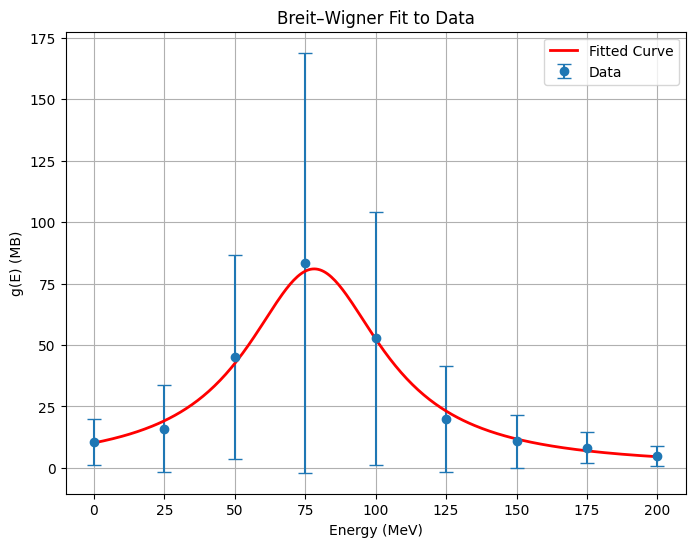

In [41]:
params0 = [52000, 75, 50] #[fr,Er,Γ]


# Find the best-fit parameters using the Newton-Raphson method:
params_fit = newton_raphson_F(params0)
fr_fit, Er_fit, Gamma_fit = params_fit

#print
print("Best-fit parameters:")
print(f"fr = {fr_fit:.3f}")
print(f"Er = {Er_fit:.3f} MeV")
print(f"Gamma = {Gamma_fit:.3f} MeV")

#plot
E_smooth = np.linspace(E[0], E[-1], 300)
g_fit = model(E_smooth, params_fit)

plt.figure(figsize=(8,6))
plt.errorbar(E, g, yerr=sigma, fmt='o', capsize=5, label='Data')
plt.plot(E_smooth, g_fit, 'r-', linewidth=2, label='Fitted Curve')
plt.xlabel('Energy (MeV)')
plt.ylabel('g(E) (MB)')
plt.title('Breit–Wigner Fit to Data')
plt.legend()
plt.grid(True)
plt.show()